# BIMODAL HM (analytical calculation is not done)

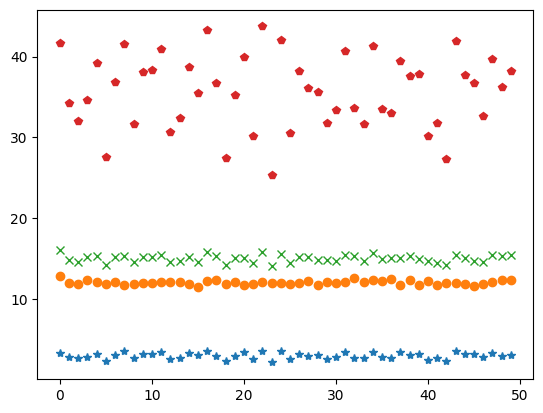

In [3]:
A = np.random.normal(loc=3, scale=.4, size=50)
B = np.random.normal(loc=12, scale=.3, size=50)
plt.plot(A, linestyle='', marker='*')
plt.plot(B, linestyle='', marker='o')
plt.plot(A+B, linestyle='', marker='x')
plt.plot(B*A, linestyle='', marker='p')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee

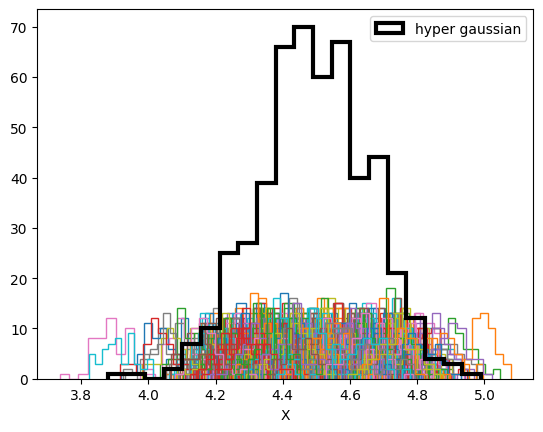

In [4]:
true_A = .7
true_parent_mean_A = 3.0 # hyperparameter
true_parent_scale_A = .2 # hyperparameter
true_parent_mean_B = 8.0 # hyperparameter
true_parent_scale_B = .3 # hyperparameter

true_child_scale = 0.05

N_obs = 500
size_child = 50

true_parent_gaussian =  true_A * np.random.normal(loc=true_parent_mean_A, scale=true_parent_scale_A, size=N_obs)+ \
                        (1 - true_A) * np.random.normal(loc=true_parent_mean_B, scale=true_parent_scale_B, size=N_obs)
err_on_mean_child = np.expand_dims(np.random.randn(N_obs)*true_child_scale, axis=1)
true_child_gaussian = np.random.normal(loc=true_parent_gaussian[:, np.newaxis] + err_on_mean_child, scale=true_child_scale, size=(N_obs, size_child))

for i in range(N_obs):
    plt.hist(true_child_gaussian[i], fill=False, histtype='step')
    #plt.vlines(np.mean(true_child_gaussian[i]), 0, size_child, linestyles='-.', alpha=0.3)
plt.hist(true_parent_gaussian, fill=False, histtype='step', color='black',linewidth=3, label='hyper gaussian', bins=20)

## The final mean is also shifted ??
#plt.vlines(true_parent_mean_A, 0, N_obs//2, label='$\mu_A$', colors='r')
#plt.vlines(true_parent_mean_B, 0, N_obs//2, label='$\mu_B$', colors='g')
plt.xlabel("X")
plt.legend()

In [7]:
def log_hyperprior(params):
    frac_A, parent_mean_A, parent_scale_A, parent_mean_B, parent_scale_B = params
    if (0 < frac_A < 1 and
        0 < parent_mean_A < 5 and 
        0 < parent_scale_A < 1 and
        5 < parent_mean_B < 10 and 
        0 < parent_scale_B < 1):
        return 0.0
    return -np.inf

def log_likelihood(params):
    frac_A, parent_mean_A, parent_scale_A, parent_mean_B, parent_scale_B = params
    samples_mu_child = true_child_gaussian
    return np.log(np.prod(size_child**-1 * np.sum(
                    frac_A * (2 * np.pi * parent_scale_A**2)**-.5 * np.exp(-(samples_mu_child - parent_mean_A)**2 / (2 * parent_scale_A**2)) + \
                    (1 - frac_A) * (2 * np.pi * parent_scale_B**2)**-.5 * np.exp(-(samples_mu_child - parent_mean_B)**2 / (2 * parent_scale_B**2)),
                    axis=1)))

def log_probability(params):
    log_prior_val = log_hyperprior(params)
    if not np.isfinite(log_prior_val):
        return -np.inf
    return log_prior_val + log_likelihood(params)

pos = np.array([true_A, true_parent_mean_A, true_parent_scale_A, true_parent_mean_B, true_parent_scale_B]) + \
                0.1 * np.random.randn(5) + 1e-6 * np.random.randn(50, 5)
nwalkers, ndim = pos.shape

#from multiprocessing import Pool

#with Pool() as pool:
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability,
)
sampler.run_mcmc(pos, 1000, progress=True)

/tmp/ipykernel_42609/2662973634.py:14: RuntimeWarning: divide by zero encountered in log
  return np.log(np.prod(size_child**-1 * np.sum(frac_A * (2 * np.pi * parent_scale_A**2)**-.5 * np.exp(-(samples_mu_child - parent_mean_A)**2 / (2 * parent_scale_A**2)), axis=1) + \
  0%|          | 0/1000 [00:00<?, ?it/s]/home/singh087/UofG/work/Code/HMtest/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:11<00:00, 89.72it/s]


State([[0.73223414 3.03522255 0.21628827 7.9504146  0.15409968]
 [0.73223324 3.03522296 0.2162891  7.95041486 0.1540991 ]
 [0.73223147 3.03522323 0.21629099 7.95041487 0.15409934]
 [0.73223361 3.03522216 0.21628789 7.95041493 0.15410024]
 [0.73223318 3.03522167 0.21628877 7.95041307 0.1540981 ]
 [0.73223229 3.0352235  0.21628953 7.95041417 0.15409788]
 [0.73223194 3.03522424 0.21628849 7.95041416 0.15410003]
 [0.73223147 3.03522264 0.21628652 7.95041328 0.15409855]
 [0.73223408 3.03522308 0.21628946 7.95041334 0.15409924]
 [0.73223329 3.03522326 0.21628945 7.95041334 0.15409794]
 [0.73223237 3.0352241  0.21628808 7.95041351 0.15409646]
 [0.7322321  3.03522348 0.21628727 7.95041302 0.1541007 ]
 [0.7322303  3.03522323 0.21628856 7.95041617 0.15409881]
 [0.7322329  3.03522292 0.21628939 7.95041388 0.15410107]
 [0.73223323 3.03522454 0.21628942 7.95041431 0.1540993 ]
 [0.73223235 3.03522441 0.21629044 7.95041317 0.15410026]
 [0.73223253 3.03522297 0.21628795 7.95041205 0.15409942]
 [0.7322

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


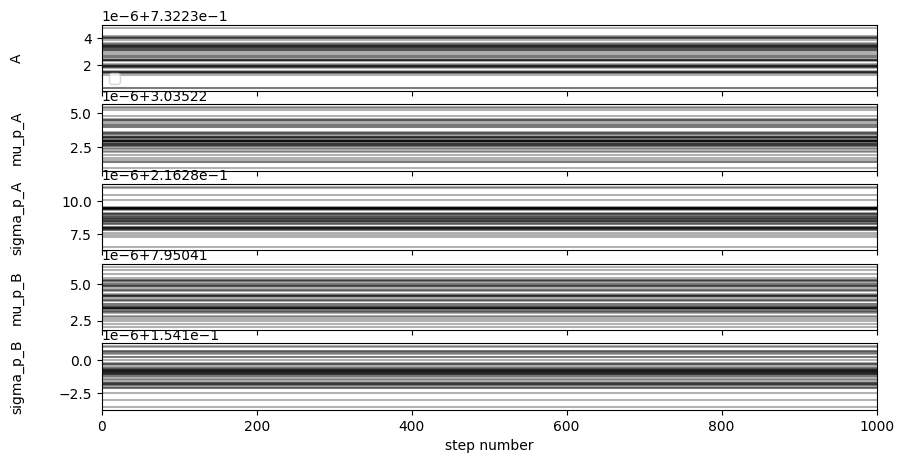

In [8]:
fig, axes = plt.subplots(5, figsize=(10, 5), sharex=True)
samples = sampler.get_chain()
labels = ["A", "mu_p_A", "sigma_p_A","mu_p_B", "sigma_p_B"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
#axes[0].hlines(true_parent_mean_A, 0, len(samples), label="true value")
#axes[1].hlines(true_parent_scale_B, 0, len(samples))
# axes[2].hlines(true_parent_mean_A, 0, len(samples))
# axes[3].hlines(true_parent_scale_B, 0, len(samples))
axes[-1].set_xlabel("step number")
axes[0].legend()

In [5]:
tau = sampler.get_autocorr_time()
print(tau)

[nan nan nan nan nan]


/home/singh087/UofG/work/Code/HMtest/lib/python3.10/site-packages/emcee/autocorr.py:38: RuntimeWarning: invalid value encountered in true_divide
  acf /= acf[0]


In [ ]:
flat_samples = sampler.get_chain(discard=50, thin=15, flat=True)
print(flat_samples.shape)

(6600, 2)


In [ ]:
np.mean(flat_samples[:,0])

3.056529886561892

In [ ]:
np.mean(flat_samples[:,1])

0.6498177697173048

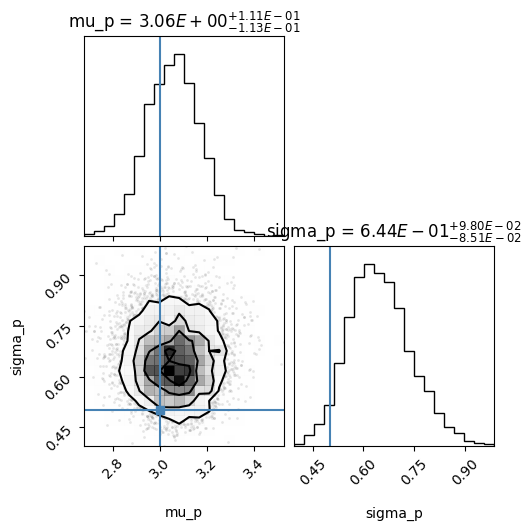

In [ ]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[true_parent_mean, true_parent_scale], title_fmt=".2E", show_titles=True, title_kwargs={'fontsize':12}
)